# 종합실습3 이변량분석(y-범주) : 직원 이직 분석

![](https://www.talentalign.com/wp-content/uploads/2019/09/main-qimg-2434943004743f79c0abf540cb4f6e2c-cropped.jpg)

* 직원 이직 분석
    * 회사에서 최근 1~2년 사이 이직률이 상승하였습니다.
    * 여러분은, 직원들이 이직하는데 중요한 요인이 무엇인지 데이터를 기반으로 한 분석을 의뢰 받았습니다.

# 1.환경준비

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.

In [2]:
# 직원 이직 데이터
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_simple3.csv'
data = pd.read_csv(path)
data.head()

,Attrition,Age,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,27,2,1898,Female,3,Single,6500,No,14,9
1,0,27,9,1965,Male,4,Single,4105,No,14,7
2,0,44,2,1703,Female,4,Married,7879,Yes,19,9
3,0,42,2,1231,Male,1,Married,6272,No,16,10
4,0,32,1,2016,Female,4,Married,10422,No,19,14


> * 변수설명
    * Attrition	:	이직여부, Yes , No (Target)
    * Age	:	나이
    * DistanceFromHome	:	집-직장 거리(마일)
    * EmployeeNumber	:	사번
    * Gender	:	성별(Male, Female)
    * JobSatisfaction	:	직무 만족도, 다음시트 참조
    * MaritalStatus	:	결혼상태(Married, Single, Divorced)
    * MonthlyIncome	:	월급(달러)
    * OverTime	:	야근여부
    * PercentSalaryHike	:	전년대비 급여인상율(%)
    * TotalWorkingYears	:	총 근무 연수



# 2.범주-->범주

In [3]:
target = 'Attrition'

## (1) Gender --> Attrition

In [4]:
feature = 'Gender'

* 교차표

In [6]:
table = pd.crosstab(data[feature], data[target])
print(table)

Attrition    0    1
Gender             
Female     157   66
Male       248  129


* 시각화

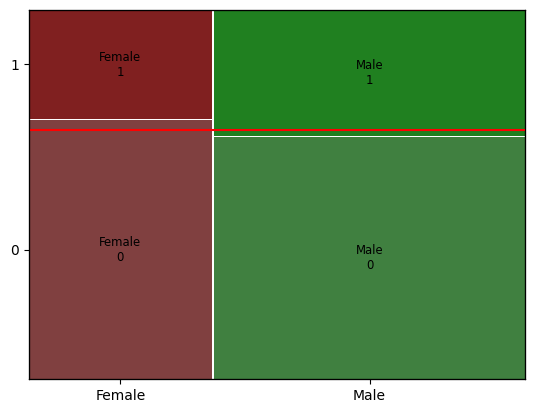

In [8]:
mosaic(data, [ feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

* 수치화 : 카이제곱검정

In [7]:
spst.chi2_contingency(table)

Chi2ContingencyResult(statistic=1.1614318259891623, pvalue=0.28116879016055174, dof=1, expected_freq=array([[150.525,  72.475],
       [254.475, 122.525]]))

* 파악된 내용을 기술해 봅시다.

In [ ]:
# 성별과 이직 여부간에는 큰 상관관계가 없다

## (2) JobSatisfaction --> Attrition

In [9]:
feature = 'JobSatisfaction'

* 교차표

In [10]:
table = pd.crosstab(data[feature], data[target])
print(table)

Attrition          0   1
JobSatisfaction         
1                 74  52
2                 79  37
3                114  59
4                138  47


* 시각화

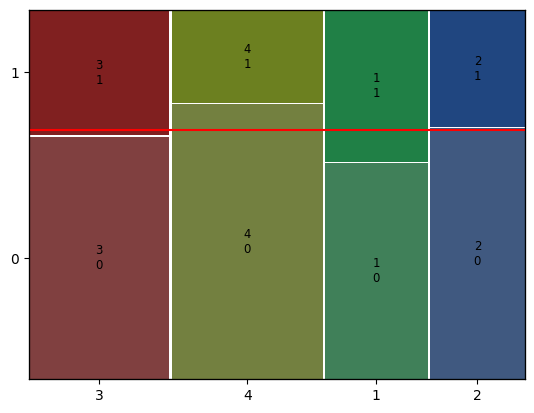

In [11]:
mosaic(data, [ feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

* 수치화 : 카이제곱검정

In [12]:
spst.chi2_contingency(table)

Chi2ContingencyResult(statistic=8.884191097554549, pvalue=0.03087092125625072, dof=3, expected_freq=array([[ 85.05 ,  40.95 ],
       [ 78.3  ,  37.7  ],
       [116.775,  56.225],
       [124.875,  60.125]]))

* 파악된 내용을 기술해 봅시다.

In [ ]:
# 직업 만족도와 이직여부는 상관관계가 있으리라 예상하였지만 실질적으로는 큰 상관관계가 없다

## (3) MaritalStatus --> Attrition

In [13]:
feature = 'MaritalStatus'

* 교차표

In [14]:
table = pd.crosstab(data[feature], data[target])
print(table)

Attrition        0    1
MaritalStatus          
Divorced        89   23
Married        205   69
Single         111  103


* 시각화

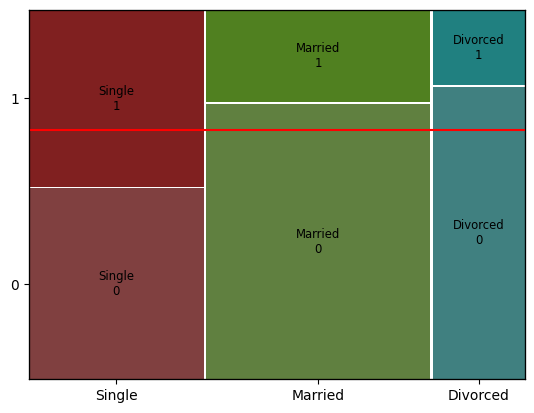

In [15]:
mosaic(data, [ feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

* 수치화 : 카이제곱검정

In [16]:
spst.chi2_contingency(table)

Chi2ContingencyResult(statistic=37.82971190707053, pvalue=6.100738829354204e-09, dof=2, expected_freq=array([[ 75.6 ,  36.4 ],
       [184.95,  89.05],
       [144.45,  69.55]]))

* 파악된 내용을 기술해 봅시다.

In [ ]:
# 결혼 여부가 큰 상관관계를 보이지는 않지만 싱글인 경우가 이직을 할 가능성이 가장 높다

## (4) OverTime --> Attrition

In [17]:
feature = 'OverTime'

* 교차표

In [18]:
table = pd.crosstab(data[feature], data[target])
print(table)

Attrition    0    1
OverTime           
No         315   90
Yes         90  105


* 시각화

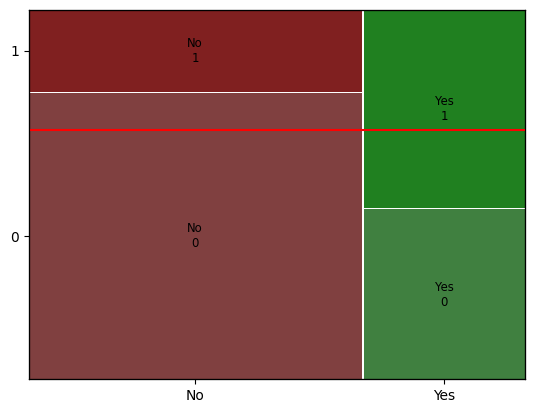

In [19]:
mosaic(data, [ feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

* 수치화 : 카이제곱검정

In [20]:
spst.chi2_contingency(table)

Chi2ContingencyResult(statistic=58.57149427899665, pvalue=1.9603625783060702e-14, dof=1, expected_freq=array([[273.375, 131.625],
       [131.625,  63.375]]))

* 파악된 내용을 기술해 봅시다.

In [ ]:
# 야근 여부와 이직 여부는 큰 상관관계를 보임. 야근을 하는 사람이 이직할 가능성이 월등히 높음

# 3.숫자-->범주

In [29]:
def anal (data, feature, target, bins=30):
    plt.figure(figsize=(12, 6))
    plt.subplot(1,3,1)
    sns.kdeplot(x=feature, data = data, hue =target, common_norm = False)
    plt.grid()
    
    plt.subplot(1,3,2)
    sns.kdeplot(x=feature, data=data, hue=target, multiple='fill')
    plt.axhline(data[target].mean(), color = 'r')
    
    plt.subplot(1,3,3)
    sns.histplot(x=feature, data = data, bins=bins, hue =target, multiple = 'fill')
    plt.axhline(data[target].mean(), color = 'r')
    
    plt.tight_layout()
    plt.show()

## (1) Age --> Attrition

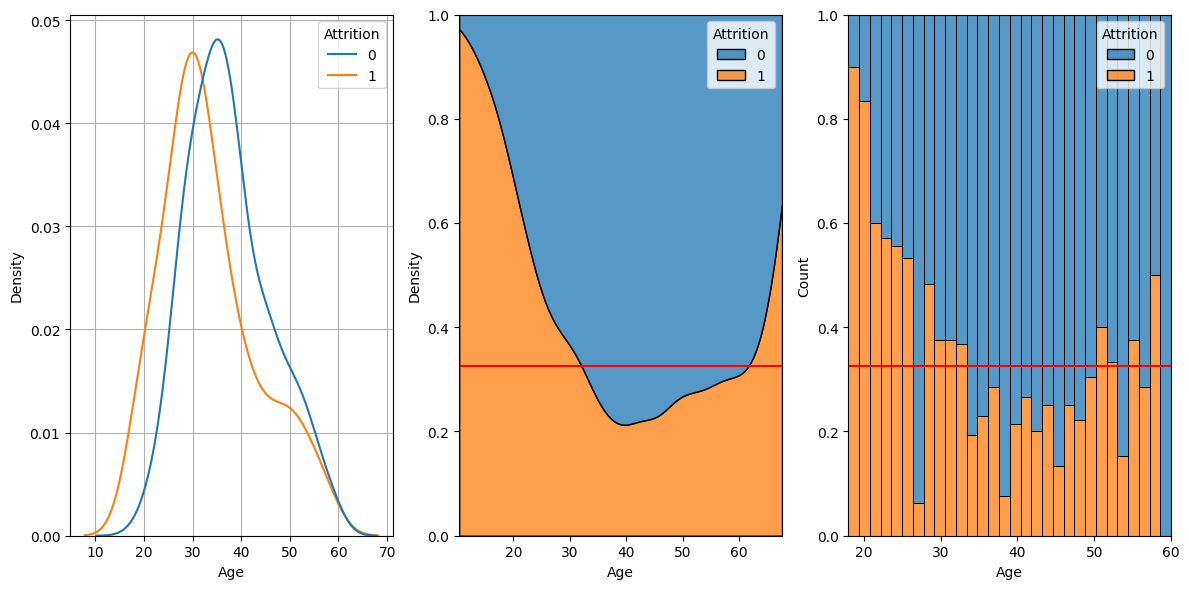

In [30]:
feature = 'Age'

anal(data, feature, target)

* 파악된 내용을 기술해 봅시다.

In [ ]:
# 20대에는 이직률이 높고 30대 이후로는 이직률이 낮아짐. 신입사원의 사내 적응을 위한 프로그램 필요.

## (2) DistanceFromHome --> Attrition

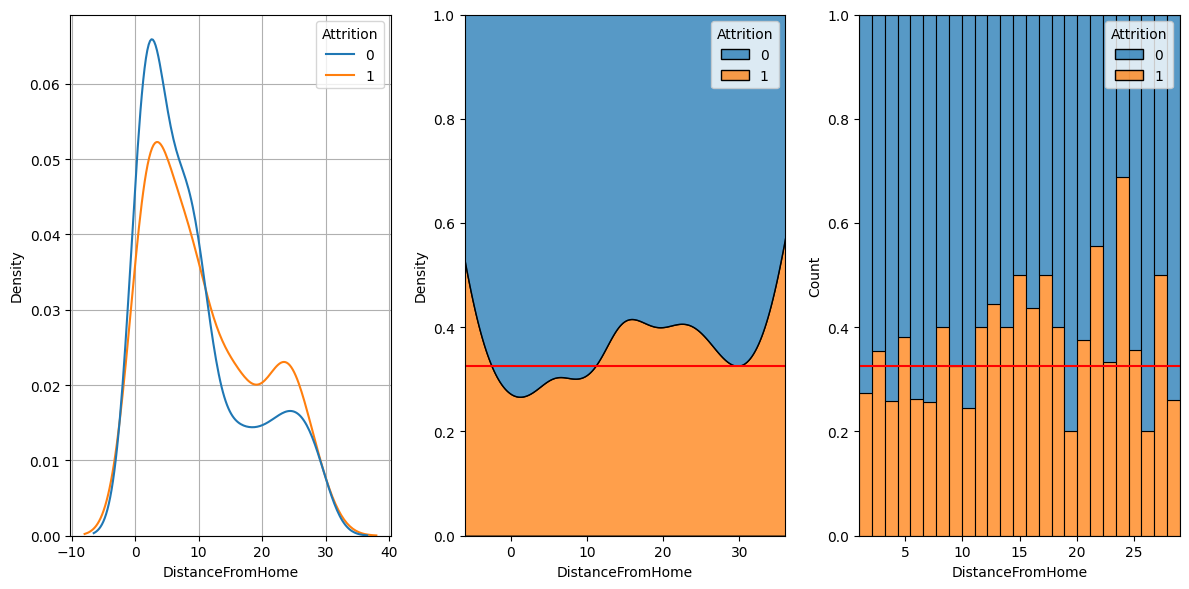

In [32]:
feature = 'DistanceFromHome'

anal(data, feature, target, bins=25)

* 파악된 내용을 기술해 봅시다.

In [ ]:
# 대체로 거리가 멀수록 이직률이 높지만 거주지와 직장간의 거리는 큰 상관관계가 있지는 않음

## (3) MonthlyIncome --> Attrition

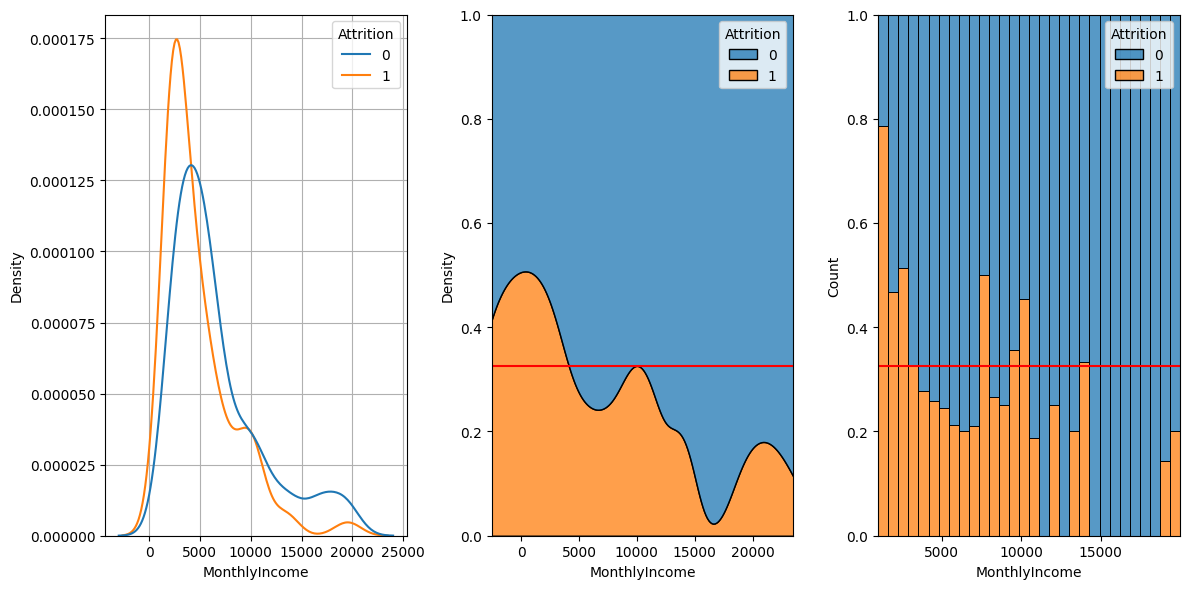

In [33]:
feature = 'MonthlyIncome'

anal(data, feature, target)

* 파악된 내용을 기술해 봅시다.

In [ ]:
# 급여가 낮을 수록 이직 확률이 높음. 급여가 가장 낮은 집단은 비정규직일 확률이 큼
# 월급이 높지만 이직을 하는 경우가 있음. 다른 회사로부터의 스카우트의 가능성

## (4) PercentSalaryHike --> Attrition

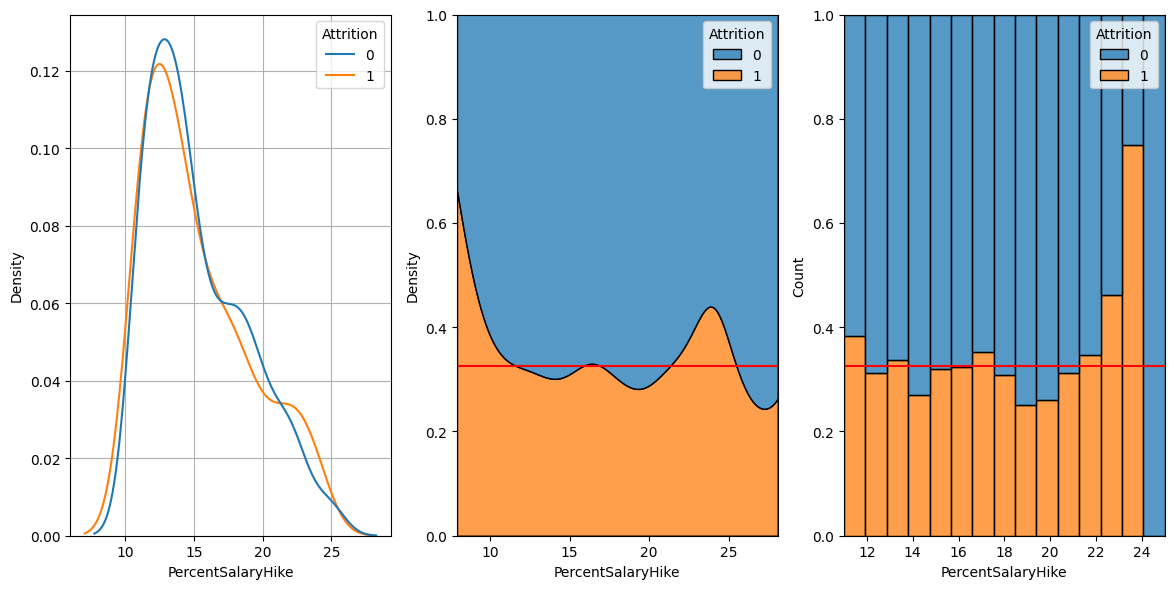

In [35]:
feature = 'PercentSalaryHike'

anal(data, feature, target, bins=15)

* 파악된 내용을 기술해 봅시다.

In [ ]:
# 인상률 자체는 이직률과 큰 상관관계가 없어보이지만 인상액과의 관계를 살펴볼 필요는 있음

## (5) TotalWorkingYears --> Attrition

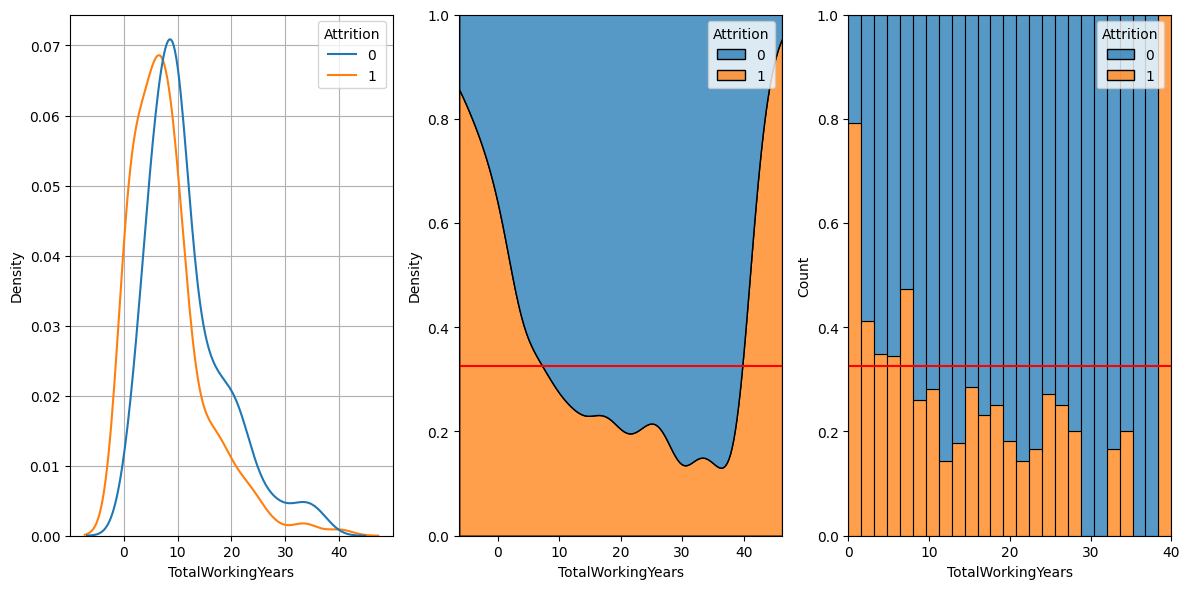

In [36]:
feature = 'TotalWorkingYears'

anal(data, feature, target, bins=25)

* 파악된 내용을 기술해 봅시다.

In [ ]:
# 경력이 아주 적거나 아주많을 때 이직할 확률이 높다. 신입사원이 오래 머물러있지 못한 경우나 퇴직으로 생각된다.

# 4.관계 정리하기

① 강한관계

In [ ]:
# Martial Status, OverTime, Age, MonthlyIncome

② 중간관계

In [ ]:
#DistanceFromHome, Job, Total Working Year

③ 관계없음(약한 관계)

In [ ]:
# PSH, Gender